In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
sep_coins = cv2.imread('penny.jpg')

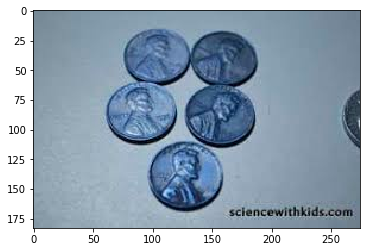

In [4]:
plt.imshow(sep_coins)

In [5]:
sep_blur = cv2.medianBlur(sep_coins,25)

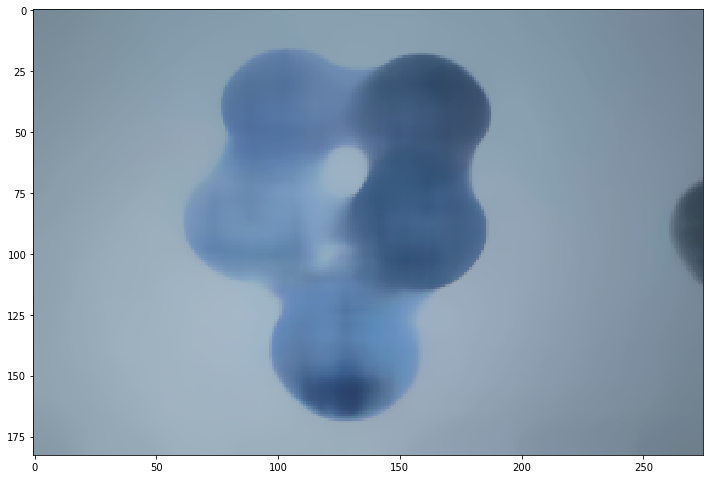

In [6]:
display(sep_blur)

In [7]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

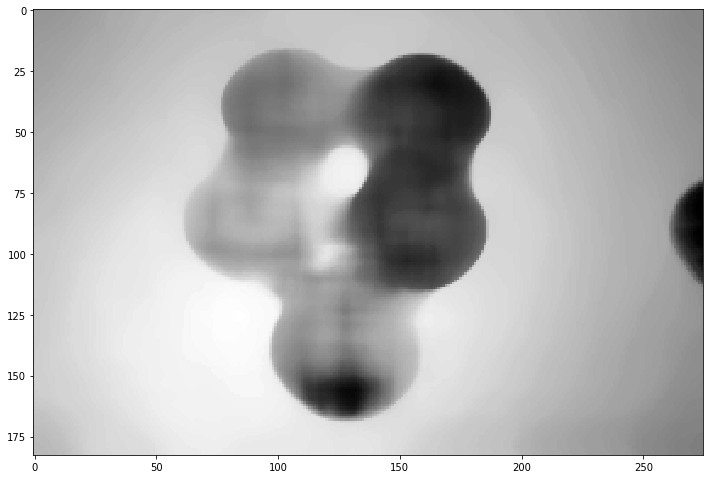

In [8]:
display(gray_sep_coins)

In [9]:
ret,sep_thresh = cv2.threshold(gray_sep_coins,127,255,cv2.THRESH_BINARY_INV)

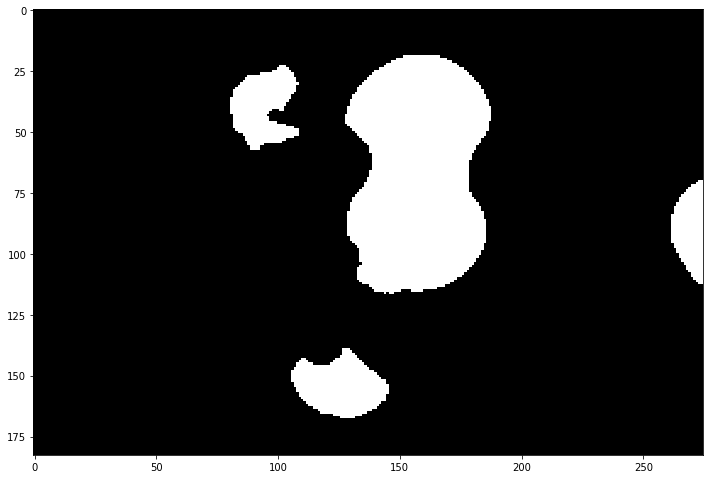

In [10]:
display(sep_thresh)

In [11]:
img,contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [12]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

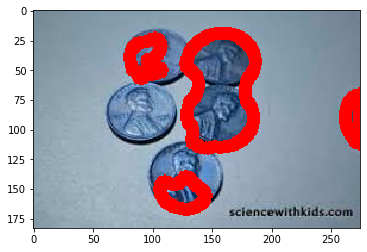

In [13]:
plt.imshow(sep_coins)

In [14]:
img = cv2.imread('penny.jpg')

In [15]:
img = cv2.medianBlur(img,35)

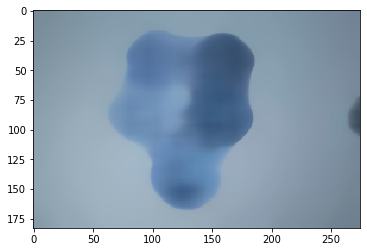

In [16]:
plt.imshow(img)

In [17]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [18]:
ret,sep_thresh = cv2.threshold(gray_sep_coins,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

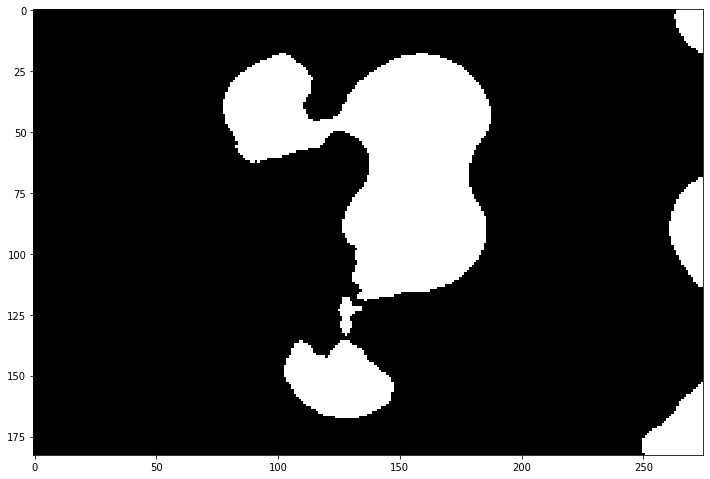

In [19]:
display(sep_thresh)

In [20]:
kernel = np.ones((3,3),np.uint8)

In [21]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [22]:
opening  = cv2.morphologyEx(sep_thresh,cv2.MORPH_OPEN,kernel,iterations=2)

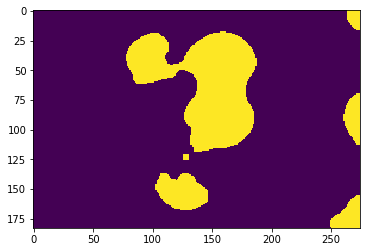

In [23]:
 plt.imshow(opening)

In [24]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

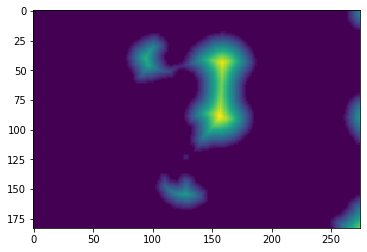

In [25]:
plt.imshow(dist_transform)

In [26]:
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

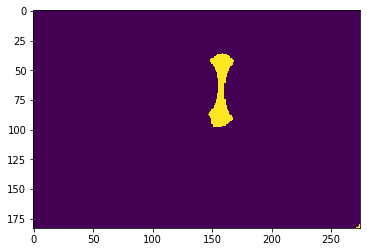

In [27]:
plt.imshow(sure_fg)

In [35]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

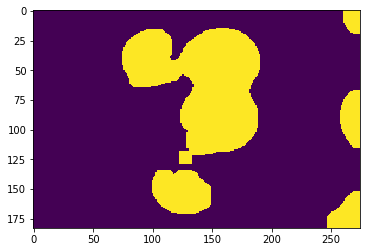

In [36]:
plt.imshow(sure_bg)

In [37]:
sure_fg = np.uint8(sure_fg)

In [39]:
unknown = cv2.subtract(sure_bg,sure_fg)

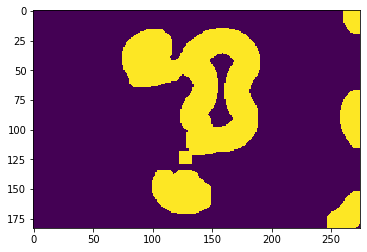

In [40]:
plt.imshow(unknown)

In [42]:
ret,markers = cv2.connectedComponents(sure_fg)

In [44]:
markers = markers + 1

In [45]:
markers[unknown==255] = 0

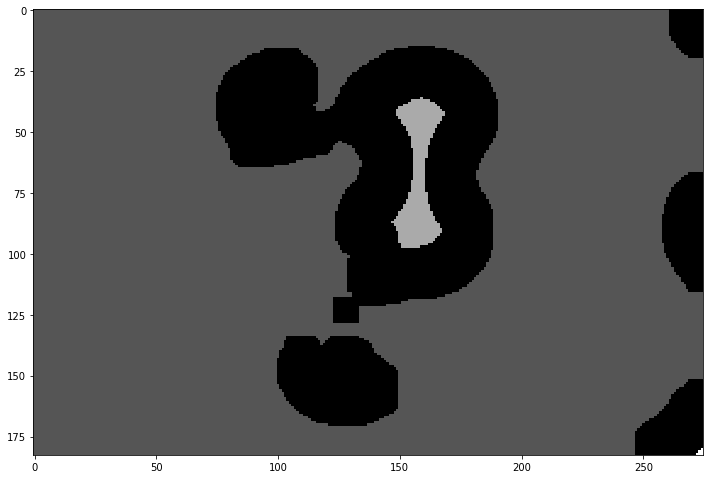

In [46]:
display(markers)

In [47]:
markers = cv2.watershed(img,markers)

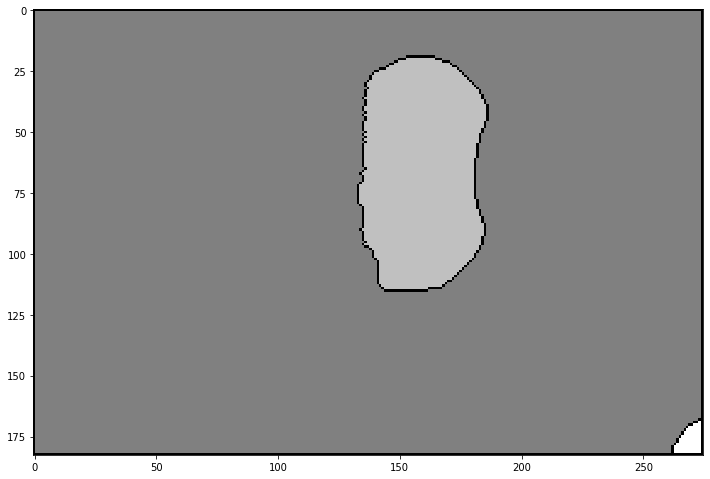

In [48]:
display(markers)

In [49]:
img,contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [54]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

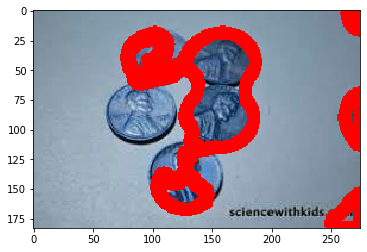

In [55]:
plt.imshow(sep_coins)